# **SUGARCRANE PREDICTION**

ในส่วนแรก จะเป็นการนำข้อมูลต่างๆ ของแปลงอ้อยต่อละแปลง เช่น อายุ พันธุ์อ้อย ความชื้น อุณหภูมิ มาใช้ในการวิเคราะห์และสร้าง column ค่าความหวานที่ได้จาก algorithm นี้

**0. Environment Setup**

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**1. Import Dataset**

In [ ]:
#https://drive.google.com/file/d/15PB8Tvh3qxwaNO_CWE-nqE152NdF6kJ3/view?usp=sharing
! gdown --id 15PB8Tvh3qxwaNO_CWE-nqE152NdF6kJ3

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15PB8Tvh3qxwaNO_CWE-nqE152NdF6kJ3
To: /content/SugarcaneData - CCS.csv
100% 1.97k/1.97k [00:00<00:00, 4.97MB/s]


In [ ]:
data1 = pd.read_csv('/content/SugarcaneData - CCS.csv')

In [ ]:
data1

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif
0,6.3,2023-6-3,K88-92,74.1,23.3,11,5
1,7.4,2023-1-10,K95-84,45.2,30.1,19,10
2,8.1,2023-4-26,LK92-11,89.9,28.2,11,6
3,5.9,2023-4-21,Khongaen 3,77.7,31.5,5,7
4,6.1,2023-6-15,K97-27,63.6,28.4,14,5
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11
6,7.3,2023-6-1,K95-84,57.0,28.6,13,5
7,14.6,2022-12-3,K88-92,60.1,23.3,4,11
8,9.4,2023-3-24,K88-92,89.4,23.1,12,8
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7


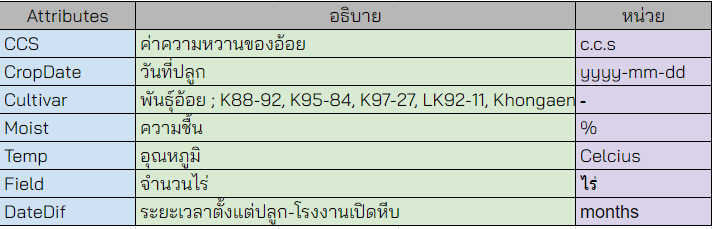

In [ ]:
data1.dtypes

CCS         float64
CropDate     object
Cultivar     object
Moist       float64
Temp        float64
Field         int64
DateDif       int64
dtype: object

**2. Data Manipulate**

สิ่งที่เราเลือก input เข้าไปใน model เรามีอยู่ 4 อย่าง คือ


*   **อายุของการปลุกอ้อย** (convert จากวันเวลาที่รถปลูกอ้อยเริ่มตัด สมมุติว่าตัดทุกวัน วันละ 2 แปลง) -> อยู่ในช่วง 6-8 เดือนคืออ้อยหวาน
*  **พันธุ์อ้อย** (สมมติพันธุ์อ้อย A>B>C)
*   **ความชื้นสัมพัทธ์** (ประมาณ 60 - 80% ถือว่าดี)
*   **อุณหภูมิ** (ประมาณ 15-45 องศาเซลเซียส ถือว่าดี)



In [ ]:
# คำนวนอายุของอ้อยแต่ละแปลง
from datetime import date, datetime, timedelta
today = date.today()
print("Today's date:", today)

Today's date: 2023-10-09


In [ ]:
num = []
for i in data1['CropDate']:
  start = i.split('-')
  y,m,d = int(start[0]),int(start[1]),int(start[2])
  dat = date(y,m,d)
  day = today - dat
  num.append(day.days)
# append ค่าเข้าไปใน column ใหม่
data1['Days'] = pd.DataFrame(num)

In [ ]:
data1

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif,Days
0,6.3,2023-6-3,K88-92,74.1,23.3,11,5,128
1,7.4,2023-1-10,K95-84,45.2,30.1,19,10,272
2,8.1,2023-4-26,LK92-11,89.9,28.2,11,6,166
3,5.9,2023-4-21,Khongaen 3,77.7,31.5,5,7,171
4,6.1,2023-6-15,K97-27,63.6,28.4,14,5,116
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11,290
6,7.3,2023-6-1,K95-84,57.0,28.6,13,5,130
7,14.6,2022-12-3,K88-92,60.1,23.3,4,11,310
8,9.4,2023-3-24,K88-92,89.4,23.1,12,8,199
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7,167


ตอนนี้เรามีเวลา 2 แบบคือ month กัน days เอาไรกดือ

In [ ]:
datacopy = data1

In [ ]:
# Weight Type by Its Value
datacopy.loc[datacopy['Cultivar'] == 'K88-92','Weight'] = 14
datacopy.loc[datacopy['Cultivar'] == 'K95-84','Weight'] = 13
datacopy.loc[datacopy['Cultivar'] == 'K97-27','Weight'] = 12.5
datacopy.loc[datacopy['Cultivar'] == 'LK92-11','Weight'] = 13
datacopy.loc[datacopy['Cultivar'] == 'Khongaen 3','Weight'] = 13
print(datacopy)

     CCS    CropDate    Cultivar  Moist  Temp  Field  DateDif  Days  Weight
0    6.3    2023-6-3      K88-92   74.1  23.3     11        5   128    14.0
1    7.4   2023-1-10      K95-84   45.2  30.1     19       10   272    13.0
2    8.1   2023-4-26     LK92-11   89.9  28.2     11        6   166    13.0
3    5.9   2023-4-21  Khongaen 3   77.7  31.5      5        7   171    13.0
4    6.1   2023-6-15      K97-27   63.6  28.4     14        5   116    12.5
5   12.6  2022-12-23      K97-27   45.8  21.5      7       11   290    12.5
6    7.3    2023-6-1      K95-84   57.0  28.6     13        5   130    13.0
7   14.6   2022-12-3      K88-92   60.1  23.3      4       11   310    14.0
8    9.4   2023-3-24      K88-92   89.4  23.1     12        8   199    14.0
9    6.2   2023-4-25     LK92-11   59.5  32.6      1        7   167    13.0
10  12.3   2022-12-9      K95-84   85.6  34.8      4       11   304    13.0
11   7.1   2023-6-19     LK92-11   86.6  29.5     15        5   112    13.0
12  12.4  20

In [ ]:
# คัดมาแค่ส่วนที่ต้องการ
dataja = datacopy[['Moist','Temp','DateDif','Days','Weight','CCS']]

ลองดูค่าทางสถิติของแต่ละค่า

In [ ]:
dataja.describe()

,Moist,Temp,DateDif,Days,Weight,CCS
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,65.534000,28.546000,9.000000,244.000000,13.190000,10.084000
std,13.769822,4.171488,2.784798,84.252051,0.513988,3.041439
min,45.100000,20.500000,4.000000,104.000000,12.500000,5.400000
25%,52.850000,25.300000,7.000000,168.000000,13.000000,7.150000
50%,65.500000,28.950000,10.000000,266.000000,13.000000,10.350000
75%,76.125000,31.750000,11.000000,313.000000,13.750000,13.025000
max,90.400000,34.800000,13.000000,372.000000,14.000000,14.600000


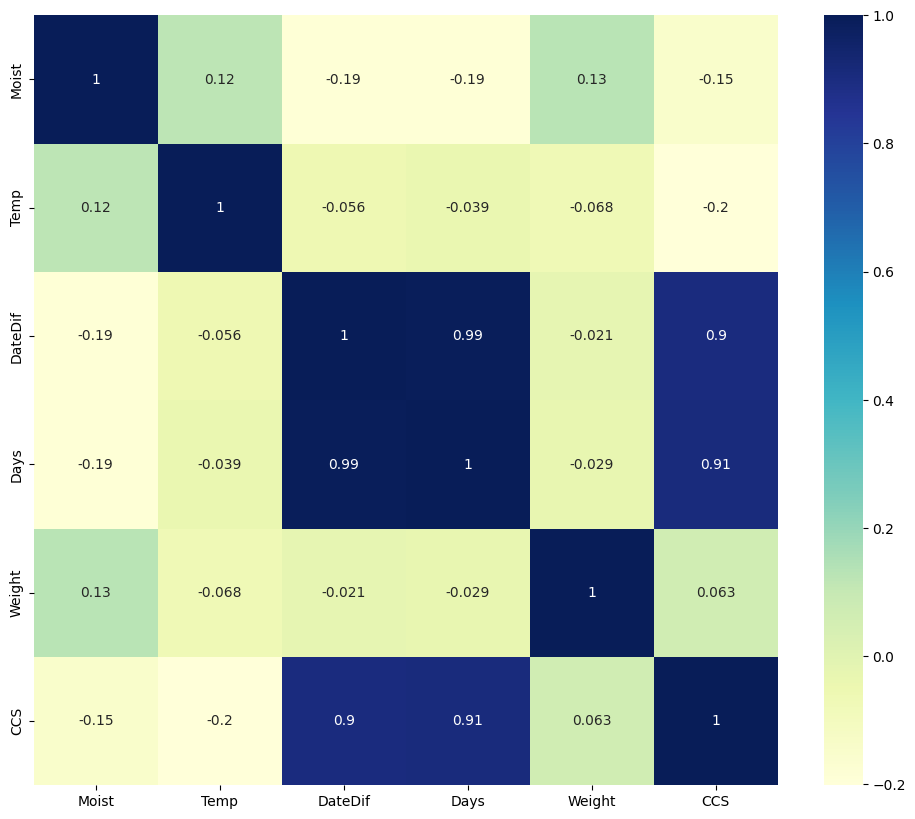

In [ ]:
plt.figure(figsize=(12,10))
cor = dataja.corr(method = 'pearson')
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

อายุของอ้อยมีความสัมพันธ์กับ CCS -> ไอเดียของเราได้มาจากการทดลองที่ทำอยู่นี่ไง

In [ ]:
# Correlation with output variable
cor_target = abs(cor["CCS"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

DateDif    0.904053
Days       0.906394
CCS        1.000000
Name: CCS, dtype: float64

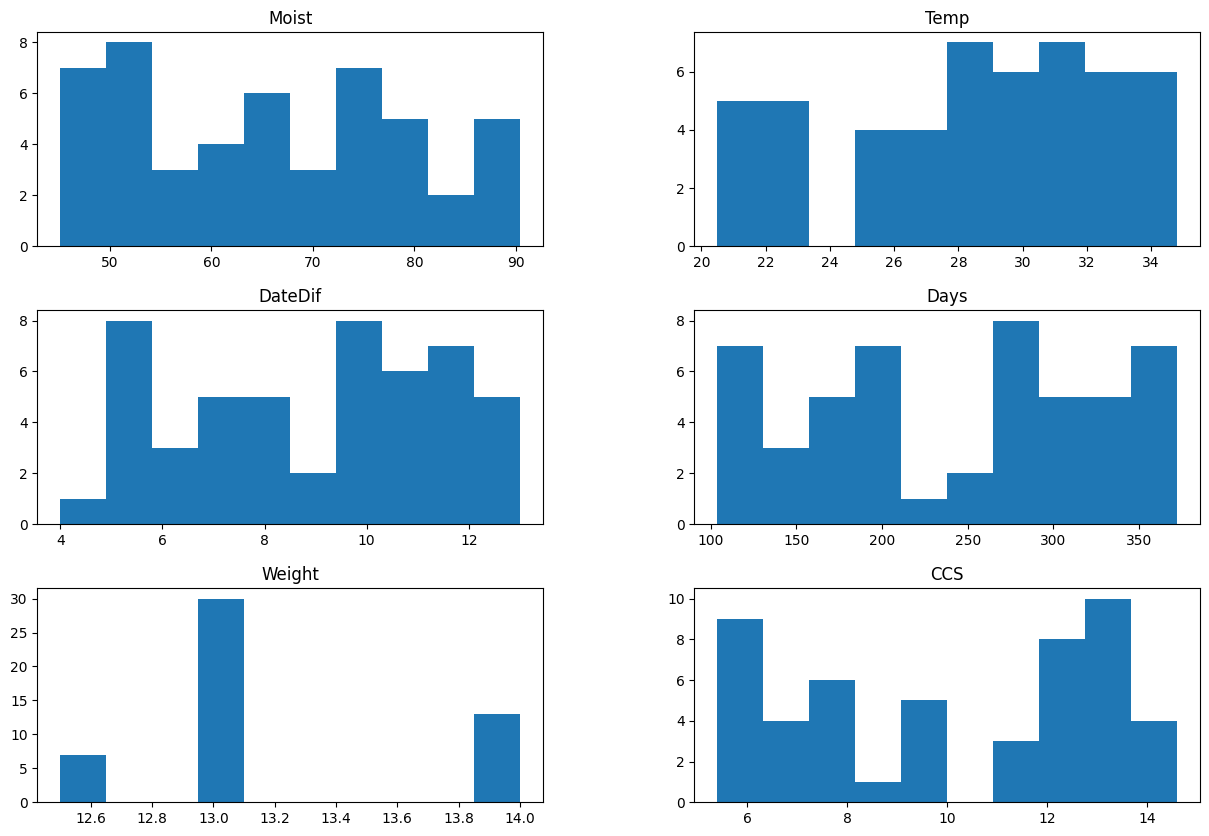

In [ ]:
dataja.hist(bins=10,figsize=(15,10),grid=False);

variable selection

In [ ]:
x = dataja[['Days']]
y = dataja["CCS"]
print(x.shape)
print(y.shape)

(50, 1)
(50,)


In [ ]:
dataja.dtypes

Moist      float64
Temp       float64
DateDif      int64
Days         int64
Weight     float64
CCS        float64
dtype: object

**3. Model Creation**

In [ ]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.33, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['Days'], dtype='object')
2.4887599509887615
[0.03142352]


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([ 9.59047553,  8.17641712,  6.57381759,  5.75680606, 13.89549781,
        8.58492289,  7.70506432, 11.28734563,  7.86218192,  6.73093519,
       11.09880451,  6.1338883 , 11.72727491,  6.51097055, 11.44446323,
       11.60158083, 11.22449859])

In [ ]:
y_test

42     7.5
29     6.1
6      7.3
19     5.4
28    13.4
17     6.2
2      8.1
43    11.6
3      5.9
21     7.3
31    12.2
4      6.1
32    13.1
0      6.3
23    11.3
5     12.6
48    11.9
Name: CCS, dtype: float64

In [ ]:
r = pd.DataFrame({"Actual": y_test, "Predict": y_pred})

Text(0, 0.5, 'Predicted Y')

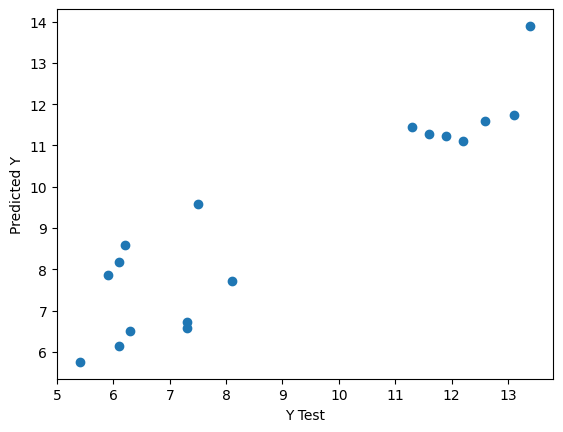

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print('MSE =',math.sqrt(mse))
#print(y_test.mean())

# R^2
print( model.score(x_test,y_test) )

MSE = 1.195924884708398
0.8301633291432422


In [ ]:
r = pd.DataFrame({"Actual": y_test, "Predict": y_pred})

In [ ]:
r

,Actual,Predict
42,7.5,9.590476
29,6.1,8.176417
6,7.3,6.573818
19,5.4,5.756806
28,13.4,13.895498
17,6.2,8.584923
2,8.1,7.705064
43,11.6,11.287346
3,5.9,7.862182
21,7.3,6.730935


เหมือนกลับกันว่า Actual มาก ค่า Predict น้อย

In [ ]:
data1

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif,Days,Weight
0,6.3,2023-6-3,K88-92,74.1,23.3,11,5,128,14.0
1,7.4,2023-1-10,K95-84,45.2,30.1,19,10,272,13.0
2,8.1,2023-4-26,LK92-11,89.9,28.2,11,6,166,13.0
3,5.9,2023-4-21,Khongaen 3,77.7,31.5,5,7,171,13.0
4,6.1,2023-6-15,K97-27,63.6,28.4,14,5,116,12.5
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11,290,12.5
6,7.3,2023-6-1,K95-84,57.0,28.6,13,5,130,13.0
7,14.6,2022-12-3,K88-92,60.1,23.3,4,11,310,14.0
8,9.4,2023-3-24,K88-92,89.4,23.1,12,8,199,14.0
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7,167,13.0


In [ ]:
datacopy

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif,Days,Weight
0,6.3,2023-6-3,K88-92,74.1,23.3,11,5,128,14.0
1,7.4,2023-1-10,K95-84,45.2,30.1,19,10,272,13.0
2,8.1,2023-4-26,LK92-11,89.9,28.2,11,6,166,13.0
3,5.9,2023-4-21,Khongaen 3,77.7,31.5,5,7,171,13.0
4,6.1,2023-6-15,K97-27,63.6,28.4,14,5,116,12.5
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11,290,12.5
6,7.3,2023-6-1,K95-84,57.0,28.6,13,5,130,13.0
7,14.6,2022-12-3,K88-92,60.1,23.3,4,11,310,14.0
8,9.4,2023-3-24,K88-92,89.4,23.1,12,8,199,14.0
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7,167,13.0


สมมติว่ามี Test ค่า เราจะเอาค่าความหวานใส่ตารางก่อน แล้วค่อยใส่คิว

In [ ]:
check = []
for i in datacopy['CCS']:
  check.append(i)
ite = []
for i in r['Actual']:
  ite.append(i)
cal = []
for i in r['Predict']:
  cal.append(i)

In [ ]:
cal

[9.590475534626012,
 8.17641712195488,
 6.57381758759426,
 5.756806060273161,
 13.895497813202578,
 8.58492288561543,
 7.705064317731168,
 11.287345629831375,
 7.862181919139072,
 6.730935189002165,
 11.09880450814189,
 6.13388830365213,
 11.727274913773506,
 6.510970547031099,
 11.444463231239279,
 11.601580832647182,
 11.224498589268213]

In [ ]:
pred = []
for i in check:
  if i in ite:
    j = check.index(i)
    k = ite.index(i)
    pred.append(cal[k])
  else:
    pred.append(0)

In [ ]:
datacopy['Calculate'] = pred

In [ ]:
datacopy

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif,Days,Weight,Calculate
0,6.3,2023-6-3,K88-92,74.1,23.3,11,5,128,14.0,6.510971
1,7.4,2023-1-10,K95-84,45.2,30.1,19,10,272,13.0,0.000000
2,8.1,2023-4-26,LK92-11,89.9,28.2,11,6,166,13.0,7.705064
3,5.9,2023-4-21,Khongaen 3,77.7,31.5,5,7,171,13.0,7.862182
4,6.1,2023-6-15,K97-27,63.6,28.4,14,5,116,12.5,8.176417
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11,290,12.5,11.601581
6,7.3,2023-6-1,K95-84,57.0,28.6,13,5,130,13.0,6.573818
7,14.6,2022-12-3,K88-92,60.1,23.3,4,11,310,14.0,0.000000
8,9.4,2023-3-24,K88-92,89.4,23.1,12,8,199,14.0,0.000000
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7,167,13.0,8.584923


**4. sort ค่าตามความหวาน**

In [ ]:
sorted_df = datacopy.sort_values(by='Calculate', ascending=False)

In [ ]:
sorted_df

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif,Days,Weight,Calculate
39,13.4,2022-12-26,K88-92,46.5,33.7,19,10,287,14.0,13.895498
28,13.4,2022-10-11,LK92-11,73.3,26.4,7,13,363,13.0,13.895498
32,13.1,2022-12-19,K88-92,74.8,28.6,12,11,294,14.0,11.727275
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11,290,12.5,11.601581
23,11.3,2022-12-28,Khongaen 3,67.2,20.5,1,10,285,13.0,11.444463
43,11.6,2023-1-2,Khongaen 3,52.0,24.9,8,10,280,13.0,11.287346
48,11.9,2023-1-4,K97-27,80.4,21.8,2,10,278,12.5,11.224499
31,12.2,2023-1-8,K97-27,53.3,34.5,20,10,274,12.5,11.098805
42,7.5,2023-2-25,LK92-11,67.6,28.7,18,9,226,13.0,9.590476
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7,167,13.0,8.584923


In [ ]:
sorted_df = sorted_df[(sorted_df['Calculate'] != 0)]

In [ ]:
sorted_df

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif,Days,Weight,Calculate
39,13.4,2022-12-26,K88-92,46.5,33.7,19,10,287,14.0,13.895498
28,13.4,2022-10-11,LK92-11,73.3,26.4,7,13,363,13.0,13.895498
32,13.1,2022-12-19,K88-92,74.8,28.6,12,11,294,14.0,11.727275
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11,290,12.5,11.601581
23,11.3,2022-12-28,Khongaen 3,67.2,20.5,1,10,285,13.0,11.444463
43,11.6,2023-1-2,Khongaen 3,52.0,24.9,8,10,280,13.0,11.287346
48,11.9,2023-1-4,K97-27,80.4,21.8,2,10,278,12.5,11.224499
31,12.2,2023-1-8,K97-27,53.3,34.5,20,10,274,12.5,11.098805
42,7.5,2023-2-25,LK92-11,67.6,28.7,18,9,226,13.0,9.590476
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7,167,13.0,8.584923


In [ ]:
number = sorted_df.shape[0]
q = [i+1 for i in range(number)]
sorted_df['Queue'] = q

<ipython-input-40-9e81f5deba56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df['Queue'] = q


In [ ]:
sorted_df

,CCS,CropDate,Cultivar,Moist,Temp,Field,DateDif,Days,Weight,Calculate,Queue
39,13.4,2022-12-26,K88-92,46.5,33.7,19,10,287,14.0,13.895498,1
28,13.4,2022-10-11,LK92-11,73.3,26.4,7,13,363,13.0,13.895498,2
32,13.1,2022-12-19,K88-92,74.8,28.6,12,11,294,14.0,11.727275,3
5,12.6,2022-12-23,K97-27,45.8,21.5,7,11,290,12.5,11.601581,4
23,11.3,2022-12-28,Khongaen 3,67.2,20.5,1,10,285,13.0,11.444463,5
43,11.6,2023-1-2,Khongaen 3,52.0,24.9,8,10,280,13.0,11.287346,6
48,11.9,2023-1-4,K97-27,80.4,21.8,2,10,278,12.5,11.224499,7
31,12.2,2023-1-8,K97-27,53.3,34.5,20,10,274,12.5,11.098805,8
42,7.5,2023-2-25,LK92-11,67.6,28.7,18,9,226,13.0,9.590476,9
9,6.2,2023-4-25,LK92-11,59.5,32.6,1,7,167,13.0,8.584923,10
